# Context (non-news) information prep

In [1]:
import pandas as pd
import numpy as np
from datetime import date, time, datetime
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d

plt.rcParams['figure.figsize'] = [15, 7.5]
plt.style.use('dark_background')

In [2]:
start_d = date(2020, 1, 1)
x_new = np.array(list(range(274)))

## Dwelling affordability

In [3]:
econ_0 = pd.read_csv("./sber_work_files/context/affordability_home_sber.csv", \
                     encoding='cp1251')
econ_0.head()

,Дата,Регион,Значение
0,2020-01-01,Россия,33.760167
1,2020-01-01,Адыгея,38.523429
2,2020-01-01,Алтай,35.384756
3,2020-01-01,Алтайский край,35.561210
4,2020-01-01,Амурская область,38.843097


In [4]:
deltify = lambda x: (datetime.strptime(x, "%Y-%m-%d").date() - start_d).days

econ_0['Дата'] = econ_0['Дата'].apply(deltify)
econ_0.head()

,Дата,Регион,Значение
0,0,Россия,33.760167
1,0,Адыгея,38.523429
2,0,Алтай,35.384756
3,0,Алтайский край,35.561210
4,0,Амурская область,38.843097


In [5]:
econ_0_spb = econ_0[econ_0['Регион'] == 'Санкт-Петербург']
econ_0_russia = econ_0[econ_0['Регион'] == 'Россия']

In [6]:
print(len(econ_0_spb))
econ_0_spb.head()

10


,Дата,Регион,Значение
62,0,Санкт-Петербург,25.409581
143,31,Санкт-Петербург,26.032447
224,60,Санкт-Петербург,26.095335
305,91,Санкт-Петербург,26.565172
386,121,Санкт-Петербург,27.248220


In [7]:
print(len(econ_0_russia))
econ_0_russia.head()

10


,Дата,Регион,Значение
0,0,Россия,33.760167
81,31,Россия,34.544932
162,60,Россия,34.196585
243,91,Россия,35.706968
324,121,Россия,35.966007


In [8]:
npa_econ_0_spb = np.array(list(econ_0_spb['Значение']))
npa_econ_0_russia = np.array(list(econ_0_russia['Значение']))
x_econ_0 = np.array(list(econ_0_russia['Дата']))

In [9]:
f_econ_0_spb = interp1d(x_econ_0, npa_econ_0_spb, kind='quadratic', bounds_error=False)
fin_econ_0_spb = f_econ_0_spb(x_new)

f_econ_0_russia = interp1d(x_econ_0, npa_econ_0_russia, kind='quadratic', bounds_error=False)
fin_econ_0_russia = f_econ_0_russia(x_new)

## Inflation and key rate

In [10]:
econ_1 = pd.read_csv("./sber_work_files/context/cbr_inflation.csv")
econ_1['date'] = econ_1['date'].apply(lambda x: str(x) + "-01")
econ_1.head()

,date,key rate,inflation
0,2020-12-01,4.25,4.9
1,2020-11-01,4.25,4.4
2,2020-10-01,4.25,4.0
3,2020-09-01,4.25,3.7
4,2020-08-01,4.25,3.6


In [11]:
deltify = lambda x: (datetime.strptime(str(x), "%Y-%m-%d").date() - start_d).days

econ_1.sort_values(by=['date'], inplace=True, ignore_index=True)
econ_1['date'] = econ_1['date'].apply(deltify)
econ_1.head()

,date,key rate,inflation
0,0,6.25,2.4
1,31,6.00,2.3
2,60,6.00,2.5
3,91,5.50,3.1
4,121,5.50,3.0


In [13]:
print(len(econ_1))
npa_econ_1_key = np.array(list(econ_1['key rate'])[:-2])
npa_econ_1_infl = np.array(list(econ_1['inflation'])[:-2])
x_econ_1 = np.array(list(econ_1['date'])[:-2])

12


In [14]:
f_econ_1_key = interp1d(x_econ_1, npa_econ_1_key, kind='quadratic', bounds_error=False)
fin_econ_1_key = f_econ_1_key(x_new)

f_econ_1_infl = interp1d(x_econ_1, npa_econ_1_infl, kind='quadratic', bounds_error=False)
fin_econ_1_infl = f_econ_1_infl(x_new)

## Dollar value

In [21]:
econ_2 = pd.read_csv("./sber_work_files/context/dollar_value.csv")
econ_2.head()

,updated,price
0,2020-10-31,79.3323
1,2020-10-30,78.8699
2,2020-10-29,77.5520
3,2020-10-28,76.4556
4,2020-10-27,76.4443


In [22]:
deltify = lambda x: (datetime.strptime(str(x), "%Y-%m-%d").date() - start_d).days

econ_2.sort_values(by=['updated'], inplace=True, ignore_index=True)
econ_2['updated'] = econ_2['updated'].apply(deltify)
econ_2.head()

,updated,price
0,0,61.9057
1,8,61.9057
2,9,61.2340
3,10,61.2632
4,13,60.9474


In [23]:
print(len(econ_2))
npa_econ_2 = np.array(list(econ_2['price']))
x_econ_2 = np.array(list(econ_2['updated']))

208


In [24]:
f_econ_2 = interp1d(x_econ_2, npa_econ_2, kind='quadratic', bounds_error=False)
fin_econ_2 = f_econ_2(x_new)

## Mortgage interest rates

In [29]:
econ_3 = pd.read_csv("./sber_work_files/context/mortgage_interest.csv")
econ_3.head()

,date,mortgage interest,primary,secondary
0,01.01.2020,9.05,8.28,9.36
1,01.02.2020,8.85,7.99,9.29
2,01.03.2020,8.73,7.81,9.16
3,01.04.2020,8.68,7.82,9.06
4,01.05.2020,8.42,6.95,8.92


In [31]:
deltify = lambda x: (datetime.strptime(str(x), "%d.%m.%Y").date() - start_d).days

econ_3['date'] = econ_3['date'].apply(deltify)
econ_3.head()

,date,mortgage interest,primary,secondary
0,0,9.05,8.28,9.36
1,31,8.85,7.99,9.29
2,60,8.73,7.81,9.16
3,91,8.68,7.82,9.06
4,121,8.42,6.95,8.92


In [32]:
print(len(econ_3))
npa_econ_3_gen = np.array(list(econ_3['mortgage interest']))
npa_econ_3_pri = np.array(list(econ_3['primary']))
npa_econ_3_sec = np.array(list(econ_3['secondary']))
x_econ_3 = np.array(list(econ_3['date']))

10


In [34]:
f_econ_3_gen = interp1d(x_econ_3, npa_econ_3_gen, kind='quadratic', bounds_error=False)
fin_econ_3_gen = f_econ_3_gen(x_new)

f_econ_3_pri = interp1d(x_econ_3, npa_econ_3_pri, kind='quadratic', bounds_error=False)
fin_econ_3_pri = f_econ_3_pri(x_new)

f_econ_3_sec = interp1d(x_econ_3, npa_econ_3_sec, kind='quadratic', bounds_error=False)
fin_econ_3_sec = f_econ_3_sec(x_new)

## Consumer price index

In [38]:
econ_4 = pd.read_csv("./sber_work_files/context/price_index.csv")
econ_4['date'] = econ_4['date'].apply(lambda x: str(x) + "-01")
econ_4.head()

,date,товары услуги,продовольствие,непр,услуги
0,2020-01-01,100.40,100.69,100.23,100.24
1,2020-02-01,100.33,100.57,100.04,100.37
2,2020-03-01,100.55,100.96,100.48,100.09
3,2020-04-01,100.83,101.72,100.44,100.12
4,2020-05-01,100.27,100.16,100.25,100.46


In [39]:
deltify = lambda x: (datetime.strptime(str(x), "%Y-%m-%d").date() - start_d).days

econ_4['date'] = econ_4['date'].apply(deltify)
econ_4.head()

,date,товары услуги,продовольствие,непр,услуги
0,0,100.40,100.69,100.23,100.24
1,31,100.33,100.57,100.04,100.37
2,60,100.55,100.96,100.48,100.09
3,91,100.83,101.72,100.44,100.12
4,121,100.27,100.16,100.25,100.46


In [40]:
print(len(econ_4))
npa_econ_4_gen = np.array(list(econ_4['товары услуги']))
npa_econ_4_food = np.array(list(econ_4['продовольствие']))
npa_econ_4_nonf = np.array(list(econ_4['непр']))
npa_econ_4_serv = np.array(list(econ_4['услуги']))
x_econ_4 = np.array(list(econ_4['date']))

10


In [41]:
f_econ_4_gen = interp1d(x_econ_4, npa_econ_4_gen, kind='quadratic', bounds_error=False)
fin_econ_4_gen = f_econ_4_gen(x_new)

f_econ_4_food = interp1d(x_econ_4, npa_econ_4_food, kind='quadratic', bounds_error=False)
fin_econ_4_food = f_econ_4_food(x_new)

f_econ_4_nonf = interp1d(x_econ_4, npa_econ_4_nonf, kind='quadratic', bounds_error=False)
fin_econ_4_nonf = f_econ_4_nonf(x_new)

f_econ_4_serv = interp1d(x_econ_4, npa_econ_4_serv, kind='quadratic', bounds_error=False)
fin_econ_4_serv = f_econ_4_serv(x_new)

## Unemployment

In [51]:
econ_5 = pd.read_csv("./sber_work_files/context/unemployment.csv")
econ_5.head()

,date,unemployment in percent
0,18.12.2020,6.1
1,20.11.2020,6.3
2,20.10.2020,6.3
3,18.09.2020,6.4
4,20.08.2020,6.3


In [52]:
deltify = lambda x: (datetime.strptime(str(x), "%d.%m.%Y").date() - start_d).days

econ_5['date'] = econ_5['date'].apply(deltify)
econ_5.sort_values(by=['date'], inplace=True, ignore_index=True)
econ_5.head()

,date,unemployment in percent
0,26,4.6
1,50,4.7
2,79,4.6
3,114,4.7
4,146,5.8


In [54]:
print(len(econ_5))
npa_econ_5 = np.array(list(econ_5['unemployment in percent'])[:-2])
x_econ_5 = np.array(list(econ_5['date'])[:-2])

12


In [56]:
f_econ_5 = interp1d(x_econ_5, npa_econ_5, kind='quadratic', bounds_error=False)
fin_econ_5 = f_econ_5(x_new)

## GDP

In [58]:
econ_6 = pd.read_csv("./sber_work_files/context/vvp.csv")
econ_6['date'] = econ_6['date'].apply(lambda x: str(x) + "-01")
econ_6.head()

,date,vvp,vvp_no_season,billion_rub
0,2020-01-01,2.0,-0.1,7787
1,2020-02-01,3.1,-0.5,8892
2,2020-03-01,-0.2,-1.2,8639
3,2020-04-01,-9.8,-8.2,7587
4,2020-05-01,-8.4,0.6,7709


In [59]:
deltify = lambda x: (datetime.strptime(str(x), "%Y-%m-%d").date() - start_d).days

econ_6['date'] = econ_6['date'].apply(deltify)
econ_6.head()

,date,vvp,vvp_no_season,billion_rub
0,0,2.0,-0.1,7787
1,31,3.1,-0.5,8892
2,60,-0.2,-1.2,8639
3,91,-9.8,-8.2,7587
4,121,-8.4,0.6,7709


In [61]:
print(len(econ_6))
npa_econ_6_gdp = np.array(list(econ_6['vvp']))
npa_econ_6_nos = np.array(list(econ_6['vvp_no_season']))
npa_econ_6_rub = np.array(list(econ_6['billion_rub']))
x_econ_6 = np.array(list(econ_6['date']))

10


In [63]:
f_econ_6_gdp = interp1d(x_econ_6, npa_econ_6_gdp, kind='quadratic', bounds_error=False)
fin_econ_6_gdp = f_econ_6_gdp(x_new)

f_econ_6_nos = interp1d(x_econ_6, npa_econ_6_nos, kind='quadratic', bounds_error=False)
fin_econ_6_nos = f_econ_6_nos(x_new)

f_econ_6_rub = interp1d(x_econ_6, npa_econ_6_rub, kind='quadratic', bounds_error=False)
fin_econ_6_rub = f_econ_6_rub(x_new)

## COVID-19

In [123]:
covid_raw = pd.read_csv("./sber_work_files/context/covid.csv")
covid_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [124]:
covid = covid_raw.filter(['date', 'location', 'total_cases', \
                          'new_cases', 'total_deaths', 'new_deaths'])
covid.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths
0,2020-02-24,Afghanistan,5.0,5.0,NaN,NaN
1,2020-02-25,Afghanistan,5.0,0.0,NaN,NaN
2,2020-02-26,Afghanistan,5.0,0.0,NaN,NaN
3,2020-02-27,Afghanistan,5.0,0.0,NaN,NaN
4,2020-02-28,Afghanistan,5.0,0.0,NaN,NaN


In [125]:
covid_rus = covid[covid['location'] == 'Russia']
covid_rus = covid_rus.reset_index(drop=True)

covid_rus.fillna(0, inplace=True)

covid_rus.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,Russia,2.0,2.0,0.0,0.0
1,2020-02-01,Russia,2.0,0.0,0.0,0.0
2,2020-02-02,Russia,2.0,0.0,0.0,0.0
3,2020-02-03,Russia,2.0,0.0,0.0,0.0
4,2020-02-04,Russia,2.0,0.0,0.0,0.0


In [126]:
covid_rus.tail()

,date,location,total_cases,new_cases,total_deaths,new_deaths
998,2022-10-25,Russia,21082412.0,6511.0,381841.0,83.0
999,2022-10-26,Russia,21089873.0,7461.0,381920.0,79.0
1000,2022-10-27,Russia,21097662.0,7789.0,382002.0,82.0
1001,2022-10-28,Russia,21105179.0,7517.0,382079.0,77.0
1002,2022-10-29,Russia,21112216.0,7037.0,382157.0,78.0


In [127]:
covid_rus.iloc[250]

date            2020-10-07
location            Russia
total_cases      1242258.0
new_cases          10981.0
total_deaths       21755.0
new_deaths           196.0
Name: 250, dtype: object

In [128]:
cov_jan = pd.DataFrame(columns=['date', 'location', \
                                'total_cases', 'new_cases', \
                                'total_deaths', 'new_deaths'])
for i in range(1, 31):
    cov_jan.loc[i-1] = [f"2020-01-{i:02d}", 'Russia', 0.0, 0.0, 0.0, 0.0]

cov_jan.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-01,Russia,0.0,0.0,0.0,0.0
1,2020-01-02,Russia,0.0,0.0,0.0,0.0
2,2020-01-03,Russia,0.0,0.0,0.0,0.0
3,2020-01-04,Russia,0.0,0.0,0.0,0.0
4,2020-01-05,Russia,0.0,0.0,0.0,0.0


In [129]:
cov_jan.tail()

,date,location,total_cases,new_cases,total_deaths,new_deaths
25,2020-01-26,Russia,0.0,0.0,0.0,0.0
26,2020-01-27,Russia,0.0,0.0,0.0,0.0
27,2020-01-28,Russia,0.0,0.0,0.0,0.0
28,2020-01-29,Russia,0.0,0.0,0.0,0.0
29,2020-01-30,Russia,0.0,0.0,0.0,0.0


In [130]:
deltify = lambda x: (datetime.strptime(str(x), "%Y-%m-%d").date() - start_d).days

covid_rus = pd.concat([cov_jan, covid_rus])
covid_rus['date'] = covid_rus['date'].apply(deltify)
covid_rus.sort_values(by=['date'], inplace=True, ignore_index=True)
covid_rus.drop(['location'], axis=1, inplace=True)
covid_rus.head()

,date,total_cases,new_cases,total_deaths,new_deaths
0,0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0


In [134]:
print(len(covid_rus))
fin_total_cases = np.array(list(covid_rus['total_cases'])[:274])
fin_new_cases = np.array(list(covid_rus['new_cases'])[:274])
fin_total_deaths = np.array(list(covid_rus['total_deaths'])[:274])
fin_new_deaths = np.array(list(covid_rus['new_deaths'])[:274])

1033


# To one big NP array

In [139]:
context_ts = np.array([fin_econ_0_spb, fin_econ_0_russia, fin_econ_1_key, fin_econ_1_infl, \
            fin_econ_2, fin_econ_3_gen, fin_econ_3_pri, fin_econ_3_sec, \
            fin_econ_4_gen, fin_econ_4_food, fin_econ_4_nonf, fin_econ_4_serv, \
            fin_econ_5, fin_econ_6_gdp, fin_econ_6_nos, fin_econ_6_rub, \
            fin_total_cases, fin_new_cases, fin_total_deaths, fin_new_deaths])

context_labels = np.array(["Индекс доступности недвижимости, СПБ",
              "Индекс доступности недвижимости, Россия",
              "Ключевая ставка ЦБ",
              "Инфляция в процентах годовых",
              "Курс доллара, руб",
              "Средние ставки по ипотеке",
              "Средние ставки по ипотеке, перв. рынок",
              "Средние ставки по ипотеке, втор. рынок",
              "Индекс потребительских цен",
              "Индекс потребительских цен, продовольствие",
              "Индекс потребительских цен, не продукты",
              "Индекс потребительских цен, услуги",
              "Безработица",
              "ВВП относительно предыдущего года",
              "Относительный ВВП за вычетом сезонных вкладов",
              "ВВП в млрд. руб.",
              "Covid-19 в РФ, всего заражений",
              "Covid-19 в РФ, новых заражений",
              "Covid-19 в РФ, всего смертей",
              "Covid-19 в РФ, новых смертей"])

assert len(big_list) == len(label_list)

### Save dataset

In [140]:
np.savez('./sber_work_files/context_w_labels.npz', \
         context_ts=context_ts, context_labels=context_labels)

### Load dataset

Shape of dataset: (20, 274)


(0.0, 20000.0)

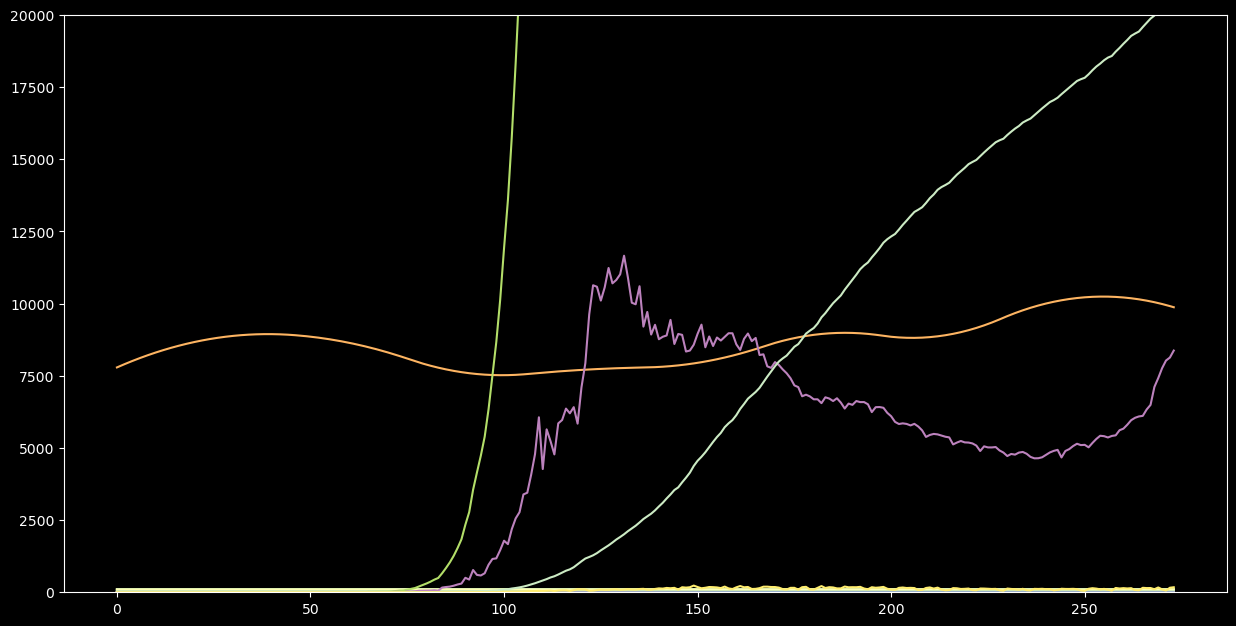

In [146]:
npzfile = np.load('./sber_work_files/context_w_labels.npz', allow_pickle=True)
con, names = npzfile['context_ts'], npzfile['context_labels']

print(f"Shape of dataset: {con.shape}")

for i in range(con.shape[0]):
    plt.plot(con[i])
plt.ylim((0, 2e4))